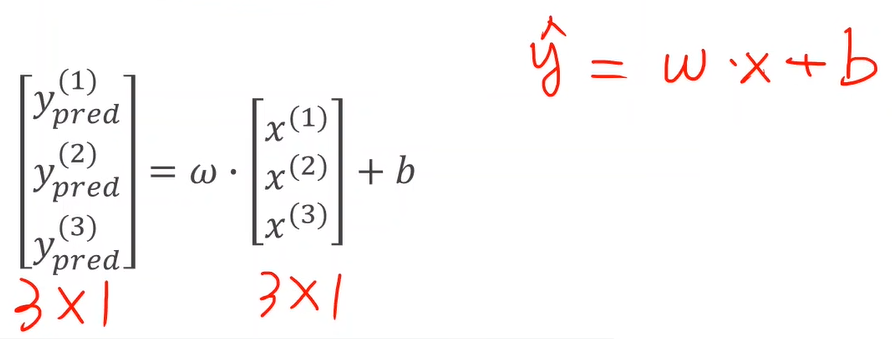

# Mini-Batch构建数据集

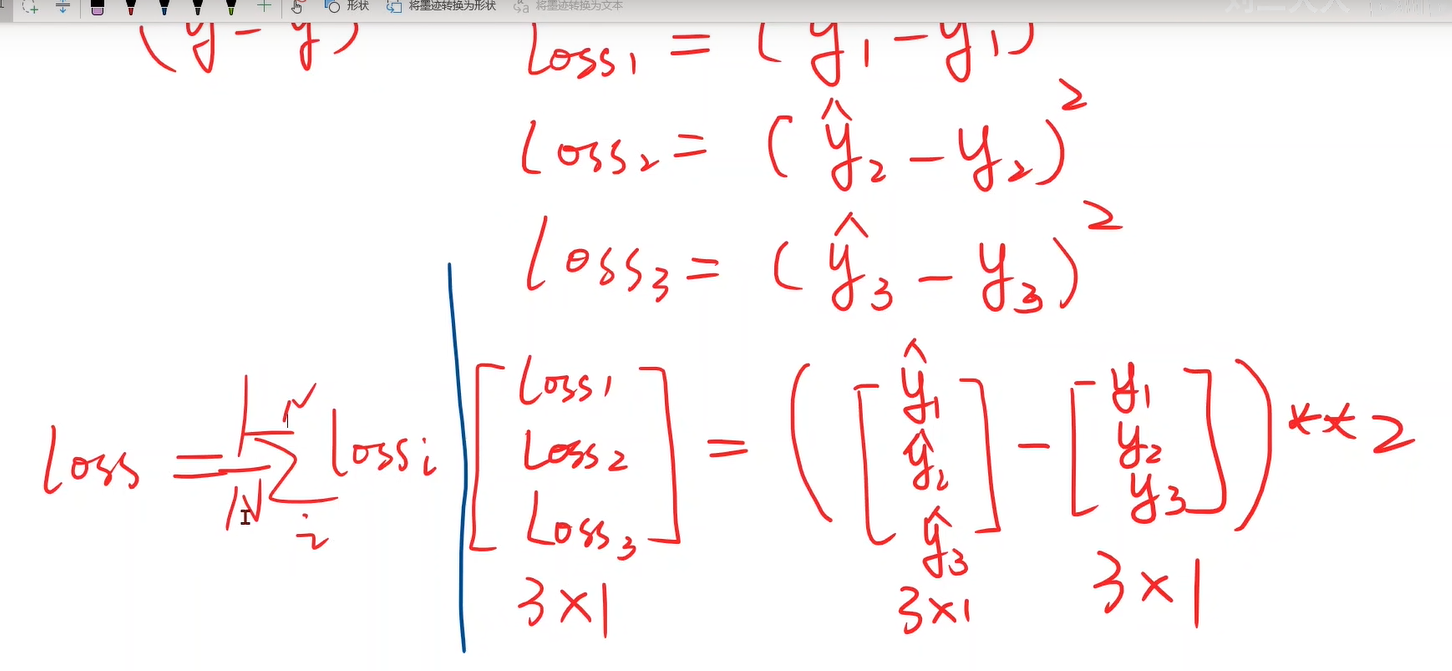

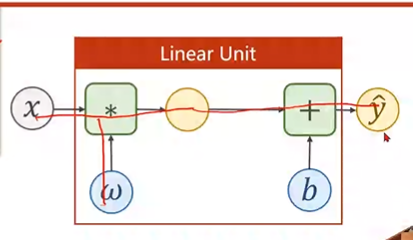

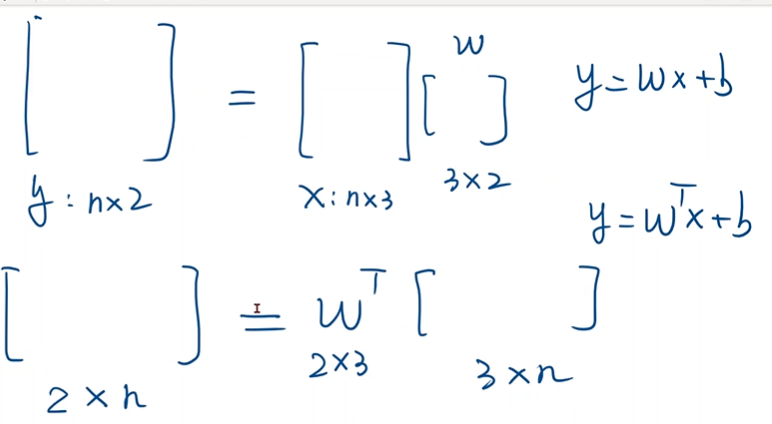

以y=2x +2为例

In [10]:
import torch

x_data = torch.Tensor([[1.0],[2.0],[3.0]])
y_data = torch.Tensor([[4.0],[6.0],[8.0]])

In [17]:
class LinearModel(torch.nn.Module):  #Module自动backward。  nn:Neural Network 
    def __init__(self):   #初始化
        super(LinearModel,self).__init__()  #必备
        # (1,1)是指输入x和输出y的特征维度，这里数据集中的x和y的特征都是1维的
        # 该线性层需要学习的参数是w和b  获取w/b的方式分别是~linear.weight/linear.bias
        self.linear = torch.nn.Linear(1,1)  #构造对象包含权重w和偏执b，自动算wx+b
    
    def forward(self,x):   #前馈
        y_pred = self.linear(x)
        return y_pred
    
model = LinearModel()


##损失函数
criterion = torch.nn.MSELoss(size_average = False) #不求平均
##优化器
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)  # model.parameters()自动完成参数的初始化操作

for epoch in range(501):
    y_pred = model(x_data)          #预测(前馈)
    loss = criterion(y_pred,y_data) #算损失
#     print(epoch,loss)
    
    optimizer.zero_grad()           #框架梯度归零
    loss.backward()                 #反向传播
    optimizer.step()                # update 参数，即更新w和b的值
    if epoch % 50 ==0:
        print(epoch,"轮","w=",model.linear.weight.item(),"b=",model.linear.bias.item())
print("最终LOSS:",loss)
print("w=",model.linear.weight.item())
print("b=",model.linear.bias.item())

#测试模型
x_test = torch.Tensor([4.0])
y_test = model(x_test)
print("f（4）预测为：",y_test.data)
    

0 轮 w= 0.8008973598480225 b= -0.5525743961334229
50 轮 w= 2.5197596549987793 b= 0.8184642791748047
100 轮 w= 2.3619370460510254 b= 1.1772323846817017
150 轮 w= 2.2520363330841064 b= 1.4270620346069336
200 轮 w= 2.175506591796875 b= 1.6010321378707886
250 轮 w= 2.1222150325775146 b= 1.7221767902374268
300 轮 w= 2.0851049423217773 b= 1.806536316871643
350 轮 w= 2.059263229370117 b= 1.8652807474136353
400 轮 w= 2.0412683486938477 b= 1.9061875343322754
450 轮 w= 2.0287375450134277 b= 1.9346729516983032
500 轮 w= 2.0200114250183105 b= 1.954508900642395
最终LOSS: tensor(0.0009, grad_fn=<MseLossBackward0>)
w= 2.0200114250183105
b= 1.954508900642395
f（4）预测为： tensor([10.0346])


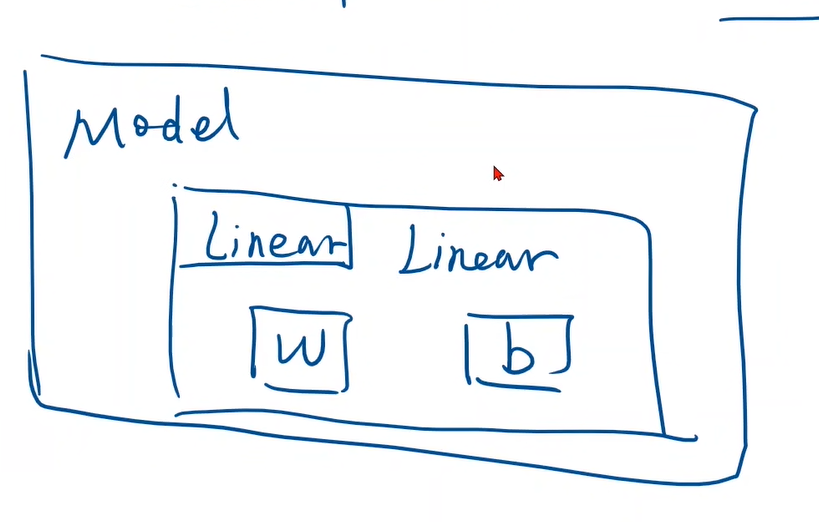

# 不同的优化器
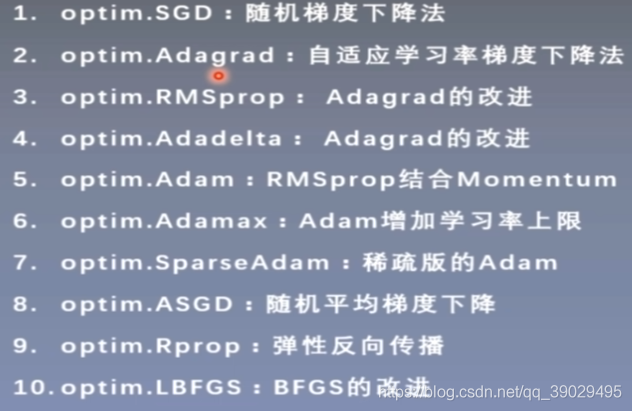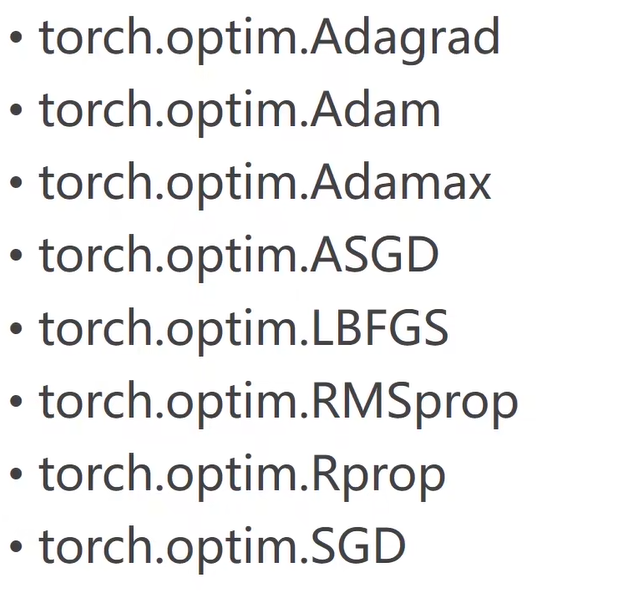



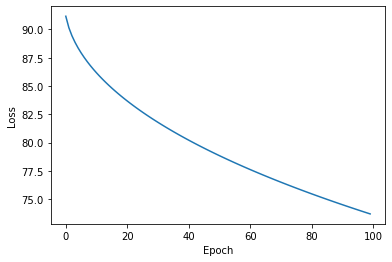

In [69]:
#y= 2x
import torch  
import matplotlib.pyplot as plt

x_data = torch.Tensor([[1.0],[2.0],[3.0]])
y_data = torch.Tensor([[2.0],[4.0],[6.0]])

class LinearModel(torch.nn.Module):  #Module自动backward。  nn:Neural Network 
    def __init__(self):   #初始化
        super(LinearModel,self).__init__()  #必备
        # (1,1)是指输入x和输出y的特征维度，这里数据集中的x和y的特征都是1维的
        # 该线性层需要学习的参数是w和b  获取w/b的方式分别是~linear.weight/linear.bias
        self.linear = torch.nn.Linear(1,1)  #构造对象包含权重w和偏执b，自动算wx+b
    
    def forward(self,x):   #前馈
        y_pred = self.linear(x)
        return y_pred
    
model = LinearModel()

##损失函数
criterion = torch.nn.MSELoss(size_average = False) #不求平均


##优化器  # model.parameters()自动完成参数的初始化操作
optimizer =  torch.optim.Adagrad(model.parameters(),lr=0.01)
#optimizer =  torch.optim.Adam(model.parameters(),lr=0.01)
#optimizer =  torch.optim.Adamax(model.parameters(),lr=0.01)
#optimizer =  torch.optim.ASGD(model.parameters(),lr=0.01)
#optimizer =  torch.optim.ASGD(model.parameters(),lr=0.01)
######optimizer = torch.optim.LBFGS(model.parameters(),lr=0.01)  
#optimizer = torch.optim.RMSprop(model.parameters(),lr=0.01)  
#optimizer = torch.optim.Rprop(model.parameters(),lr=0.01)  
#optimizer =  torch.optim.SGD(model.parameters(),lr=0.01)
Loss=[]
Epoch=[]
for epoch in range(100):
    y_pred = model(x_data)          #预测(前馈)
    loss = criterion(y_pred,y_data) #算损失   
    Loss.append(loss.item())
    Epoch.append(epoch)
    optimizer.zero_grad()           #框架梯度归零
    loss.backward()                 #反向传播
    optimizer.step()                # update 参数，即更新w和b的值


plt.plot(Epoch,Loss)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()  

    

D:\ANnaconda\envs\HBHB\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


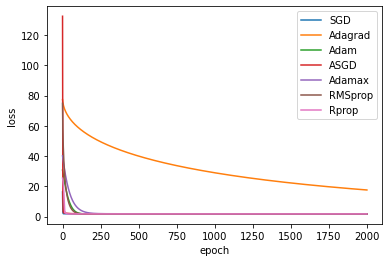

In [82]:
# 不同的优化器的结果对比
import numpy as np
import torch
import matplotlib.pyplot as plt
 
# 准备数据集
x_data = torch.Tensor([[1.0], [2.0], [4.0]])  # 二阶张量[3,1]
y_data = torch.Tensor([[2.0], [5.0], [6.0]])  # [3,1]
 
 
# 设计模型类
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
 
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
 
 
# 生成四个模型对象
models = []
for i in range(7):
    model = LinearModel()
    models.append(model)
    
# 损失和优化器
criterion = torch.nn.MSELoss(size_average=False)
# 优化器字典，我这里只用了四种优化器
optimizer_list = {}
SGD = torch.optim.SGD(models[0].parameters(), lr=0.01)
Adagrad = torch.optim.Adagrad(models[1].parameters(), lr=0.01)
Adam = torch.optim.Adam(models[2].parameters(), lr=0.01)
ASGD = torch.optim.ASGD(models[3].parameters(), lr=0.01)
Adamax = torch.optim.Adamax(models[4].parameters(), lr=0.01)
RMSprop= torch.optim.RMSprop(models[5].parameters(),lr=0.01)  
Rprop= torch.optim.Rprop(models[6].parameters(),lr=0.01) 
optimizer_list['SGD'] = SGD
optimizer_list['Adagrad'] = Adagrad
optimizer_list['Adam'] = Adam
optimizer_list['ASGD'] = ASGD
optimizer_list['Adamax'] = Adamax
optimizer_list['RMSprop'] = RMSprop
optimizer_list['Rprop'] = Rprop


# 训练周期
loss_dict = {}
# 不同的优化器
for idx, (name, optimizer) in enumerate(optimizer_list.items()):
    list = []  # 暂时存入每个优化器的损失值
    for epoch in range(2000):
        # 正向
        y_pred = models[idx](x_data)  # 调用对应的模型
        loss = criterion(y_pred, y_data)
        # 将对应的优化器的损失存入列表中
        list.append(loss.item())
        # 反向
        loss.backward()
        # 更新
        optimizer.step()
        optimizer.zero_grad()
    # 训练周期结束后
    loss_dict[name] = list

# 画图
for name, loss_list in loss_dict.items():
    plt.plot(np.arange(2000), loss_list, label=name)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()